# **Linear Regression to Predict Housing Price**
> By MOHAMED SHAFEEK T
   
   ---

## **About the Dataset :**
### This dataset provides comprehensive information for house price prediction, with 13 column names:

1. **Price**: The price of the house.

2. **Area**: The total area of the house in square feet.
3. **Bedrooms**: The number of bedrooms in the house.
4. **Bathrooms**: The number of bathrooms in the house.
5. **Stories**: The number of stories in the house.
6. **Mainroad**: Whether the house is connected to the main road (Yes/No).
7. **Guestroom**: Whether the house has a guest room (Yes/No).
8. **Basement**: Whether the house has a basement (Yes/No).
9. **Hot water heating**: Whether the house has a hot water heating system (Yes/No).
10. **Airconditioning**: Whether the house has an air conditioning system (Yes/No).
11. **Parking**: The number of parking spaces available within the house.
12. **Prefarea**: Whether the house is located in a preferred area (Yes/No).
13. **Furnishing status**: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/housing-price-prediction/Housing.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Finding the Number of Rows and Columns present in the dataset
df.shape

(545, 13)

## Part 01 : Data Cleaning

In [6]:
# Checking for missing values in the dataset
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Filling missing values if necessary
# Here we replace missing numerical values with the median and categorical values with the mode
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [9]:
# Dropping any rows with missing target values (if present)
df.dropna(subset=['price'], inplace=True)

In [10]:
# Displaying the data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [11]:
# Converting categorical variables into dummy/indicator variables (one-hot encoding)
df = pd.get_dummies(df, drop_first=True)

## Part 02 : Data Analysis

In [14]:
# Summary statistics to understand the distribution of data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [16]:
# Checking the correlation matrix to find the most correlated features with 'Price'
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


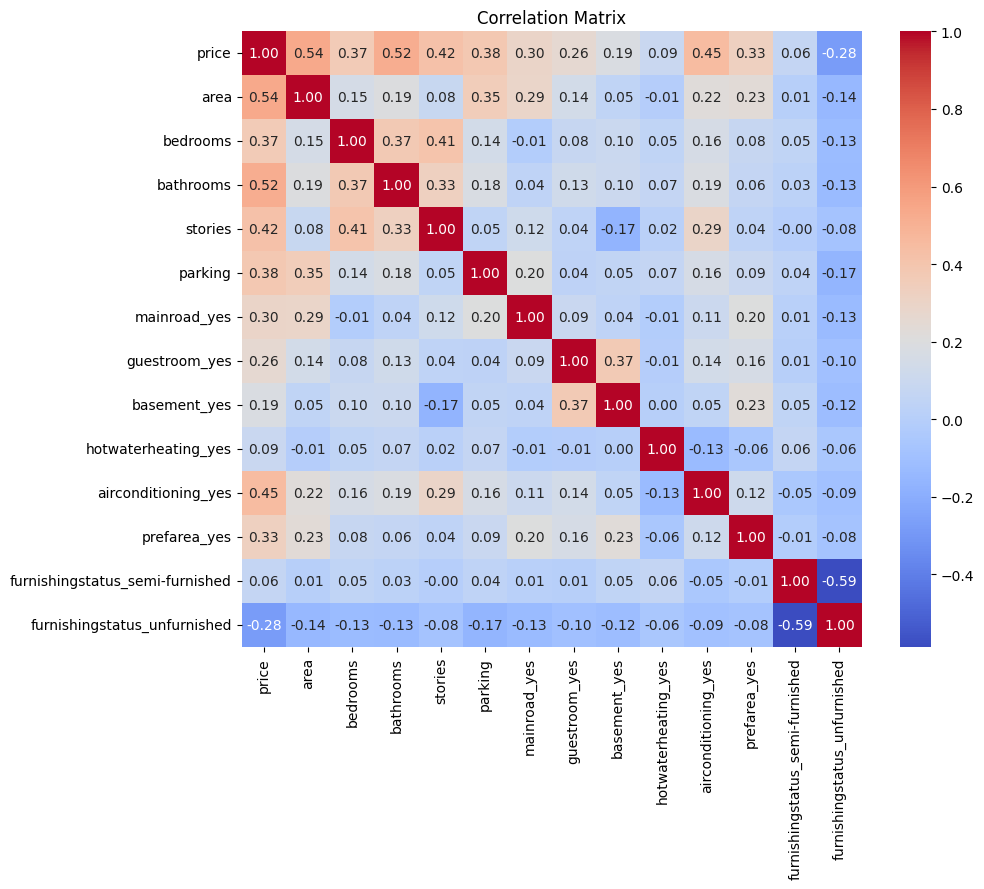

In [17]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Part 03 : Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


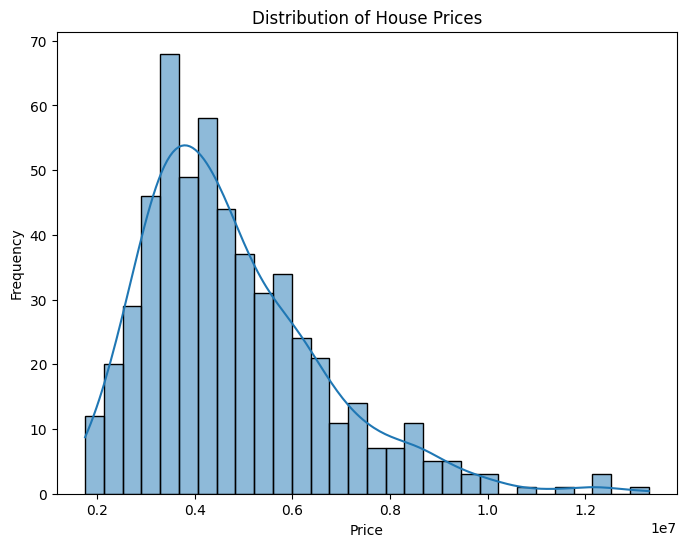

In [19]:
# Distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

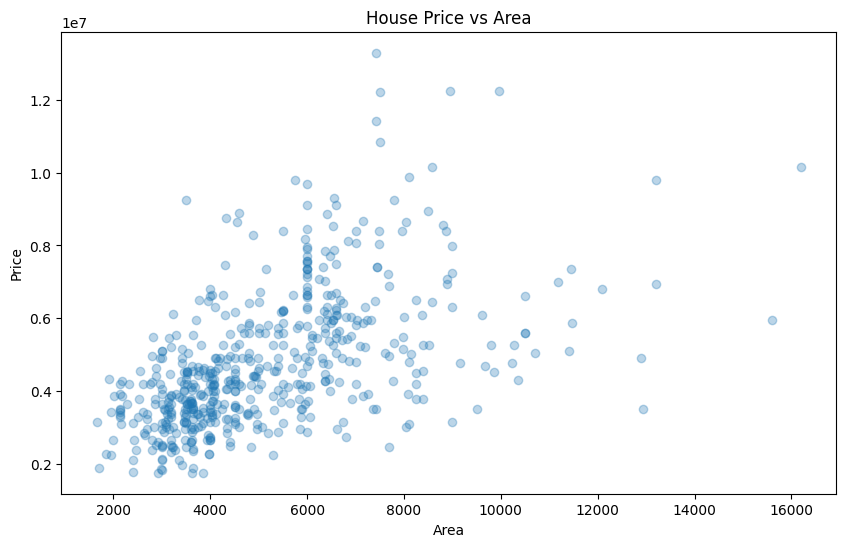

In [21]:
# Scatter plot between some important features and the target variable
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.3)
plt.title('House Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

## Part 04 : Feature Selection and Scaling 

In [22]:
# Selecting the features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

In [23]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardizing the features (optional but recommended for linear regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Part 05 : Building the Linear Regression Model

In [25]:
# Initializing the Linear Regression model
lr_model = LinearRegression()

In [26]:
# Training (Fit) the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predicting house prices on the testing set
y_pred = lr_model.predict(X_test)

## Part 06 : Model Evaluation

In [28]:
# Calculating the Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Since we're using Linear Regression, to evaluate the performance of the model, the concept of "accuracy" isn't directly applicable as it is for classification tasks. Instead, for regression models, the evaluation metrics are:

**R-squared (R² score)** : The R-squared score, or coefficient of determination, represents the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.

**Mean Absolute Error (MAE)** : Measures the average absolute difference between the actual and predicted values. It gives a clear indication of how much error is present on average.

**Mean Squared Error (MSE)** : Measures the average of the squared differences between the actual and predicted values. Squaring the errors emphasizes larger errors.

**Root Mean Squared Error (RMSE)** : The square root of the MSE. This brings the error back to the same scale as the target variable.

### Difference between R-squared and MAE, MSE, and RMSE :

**R-squared** tells you how well the model fits the data (the percentage of explained variance).

**MAE, MSE, and RMSE** tell you the magnitude of the prediction errors, with RMSE and MSE penalizing larger errors more than MAE.

In [29]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 1754318687330.67
R-squared Score: 0.65


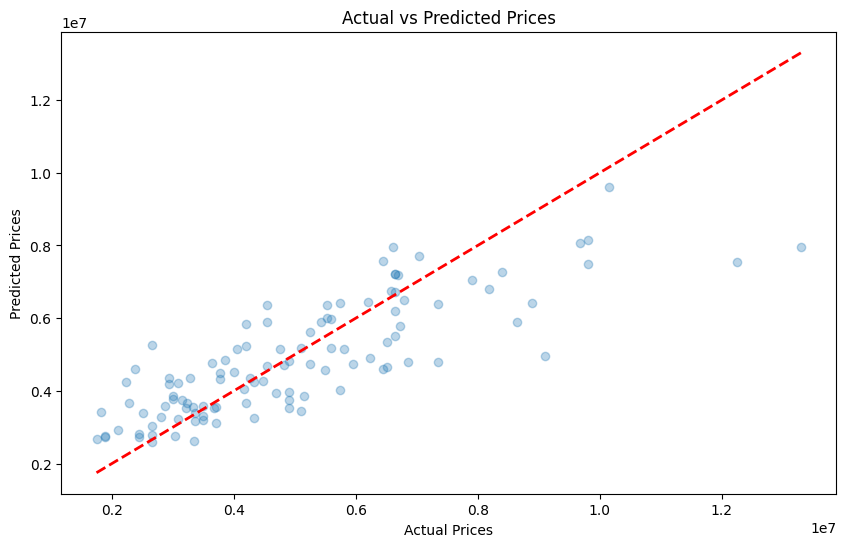

In [30]:
# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## Part 07 : Extracting Information from the Model

In [31]:
# Displaying the model's coefficients (weights) and intercept
coefficients = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                   Coefficient
area                             519552.416340
bedrooms                          57349.559419
bathrooms                        521879.027748
stories                          349251.438906
parking                          192005.953667
mainroad_yes                     128498.628215
guestroom_yes                     88768.667686
basement_yes                     187067.803214
hotwaterheating_yes              149862.702991
airconditioning_yes              365157.393851
prefarea_yes                     266656.351993
furnishingstatus_semi-furnished  -62837.321865
furnishingstatus_unfurnished    -192015.917982


In [32]:
# The intercept of the regression line
print(f'Intercept: {lr_model.intercept_:.2f}')

Intercept: 4706527.39


<Figure size 1000x800 with 0 Axes>

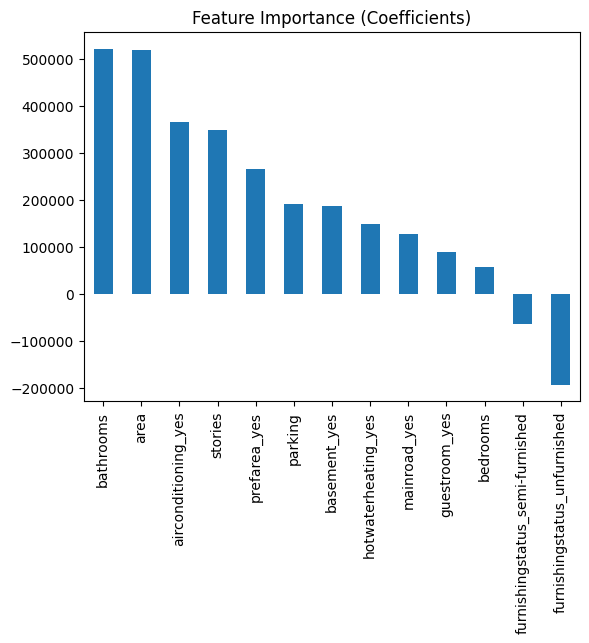

In [33]:
# Feature importance: Higher absolute values of coefficients indicate more impact on the price
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
plt.figure(figsize=(10, 8))
coefficients.plot(kind='bar', legend=False)
plt.title('Feature Importance (Coefficients)')
plt.show()

# Thank You
> Mohamed Shafeek T